In [1]:
! cd Desktop/MADE/HPC/

In [10]:
import pandas as pd
import numpy as np

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from pylab import rcParams

## Task 1

In [3]:
data = pd.read_csv("Desktop/MADE/HPC/data.csv", header=None)

In [5]:
data.head(n=3)

,0,1,2,3,4,5,6
0,1993-5-1,1128.57,06/1993: Sum = 1.1 TFlop/s,59.7,06/1993: #1 = 59.7 GFlop/s,0.42,06/1993: #500 = 0.4 GFlop/s]
1,1993-10-1,1493.35,11/1993: Sum = 1.5 TFlop/s,124.0,11/1993: #1 = 124.0 GFlop/s,0.47,11/1993: #500 = 0.5 GFlop/s]
2,1994-5-1,2317.01,06/1994: Sum = 2.3 TFlop/s,143.4,06/1994: #1 = 143.4 GFlop/s,0.84,06/1994: #500 = 0.8 GFlop/s]


In [6]:
data.tail(n=3)

,0,1,2,3,4,5,6
54,2020-5-1,2.206134e+09,06/2020: Sum = 2.2 EFlop/s,415530000.0,06/2020: #1 = 415.5 PFlop/s,1228000.0,06/2020: #500 = 1.2 PFlop/s]
55,2020-10-1,2.428762e+09,11/2020: Sum = 2.4 EFlop/s,442010000.0,11/2020: #1 = 442.0 PFlop/s,1316840.0,11/2020: #500 = 1.3 PFlop/s]
56,2021-5-1,2.786059e+09,06/2021: Sum = 2.8 EFlop/s,442010000.0,06/2021: #1 = 442.0 PFlop/s,1511000.0,06/2021: #500 = 1.5 PFlop/s]


In [7]:
sample_data = data.iloc[::4, :]

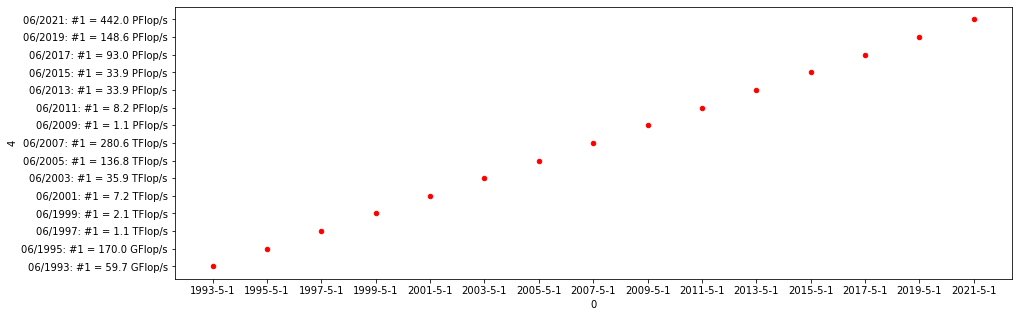

In [13]:
rcParams['figure.figsize'] = 15, 5

sample_data.plot(kind='scatter',x=0,y=4,color='red')
plt.show()

In [14]:
def process_row(s):
    date, _, _, val, n_flops = s.split()
    date = date.rstrip(":")
    val = float(val)
    return date, val, n_flops

In [15]:
# all_n_flops = set()
month_years = []
vals = []

n_flops_mapping = {'GFlop/s': 10 ** 9, 'PFlop/s': 10 ** 15, 'TFlop/s': 10 ** 12}

for s in data[4].values:
    date, val, n_flops = process_row(s)
    n_flops = n_flops_mapping[n_flops]
    val = float(val) * n_flops
    month_years.append(date)
    vals.append(val)
# all_n_flops

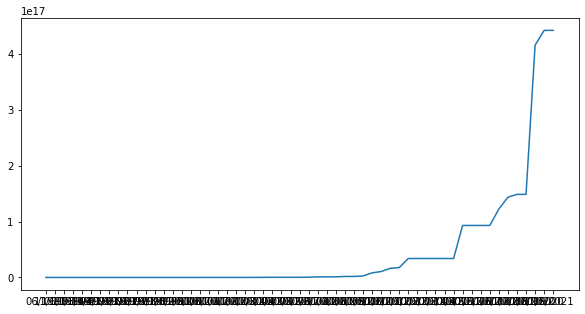

In [19]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

plt.plot(month_years, vals)
plt.show()

In [20]:
log_vals = []
for val in vals:
    log_vals.append(np.log(val))
#log_vals

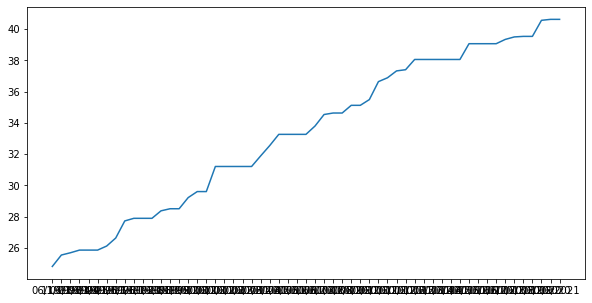

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

plt.plot(month_years, log_vals)
plt.show()

In [23]:
from statsmodels.tsa.arima.model import ARIMA
from random import random


model = ARIMA(vals, order=(1, 1, 1))
# (p,d,q) - autoregressive, differences, and moving average components, chosen using train data

model_fit = model.fit()

# make prediction
y_pred = model_fit.predict(len(data), len(data), typ='levels')
print(y_pred)

[4.66587763e+17]


In [25]:
print(vals[-4:])

[1.486e+17, 4.155e+17, 4.42e+17, 4.42e+17]


## Task 2

In [26]:
data2 = pd.read_csv("Desktop/MADE/HPC/data2.csv", sep=";")

In [28]:
data2[["Rank", 'Manufacturer', "Power (kW)"]].head(n=3)

,Rank,Manufacturer,Power (kW)
0,1,Fujitsu,"29 899,23"
1,2,IBM,"10 096,00"
2,3,IBM / NVIDIA / Mellanox,"7 438,28"


In [ ]:
# for i in range(len(data2.columns)):
#     col = data2.columns[i]
#     print("col:", col)
#     vals = data2[col]
#     print(vals[:3])
#     print("\n")

In [29]:
data2.isna().sum()

Rank                                 0
Previous Rank                       58
First Appearance                     0
First Rank                           0
Name                               178
Computer                             0
Site                                 0
Manufacturer                         0
Country                              0
Year                                 0
Segment                              0
Total Cores                          0
Accelerator/Co-Processor Cores     352
Rmax [TFlop/s]                       0
Rpeak [TFlop/s]                      0
Nmax                                 4
Nhalf                              487
HPCG [TFlop/s]                     413
Power (kW)                         319
Power Source                       319
Power Efficiency [GFlops/Watts]    319
Memory                             499
Architecture                         0
Processor                            0
Processor Technology                 0
Processor Speed (MHz)    

In [30]:
def process_power(s):
    try:
        return float(s.replace('\xa0', "").replace(",", "."))
    except AttributeError:
        return None

powers = data2["Power (kW)"]
vals = powers.values
processed_powers = []
total_power = 0
filled_vals = []
for power in powers:
    processed_power = process_power(power)
    if processed_power is not None:
        total_power += processed_power
        filled_vals.append(processed_power)
        
    processed_powers.append(processed_power)

aver_power = sum(filled_vals) / len(filled_vals)
aver_power

1900.5513812154695

(array([66., 48., 37.,  4.,  5.,  3.,  4.,  2.,  1.,  0.,  1.,  0.,  2.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  3.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   61.36  ,   658.1174,  1254.8748,  1851.6322,  2448.3896,
         3045.147 ,  3641.9044,  4238.6618,  4835.4192,  5432.1766,
         6028.934 ,  6625.6914,  7222.4488,  7819.2062,  8415.9636,
         9012.721 ,  9609.4784, 10206.2358, 10802.9932, 11399.7506,
        11996.508 , 12593.2654, 13190.0228, 13786.7802, 14383.5376,
        14980.295 , 15577.0524, 16173.8098, 16770.5672, 17367.3246,
        17964.082 , 18560.8394, 19157.5968, 19754.3542, 20351.1116,
        20947.869 , 21544.6264, 22141.3838, 22738.1412, 23334.8986,
        23931.656 , 24528.4134, 25125.1708, 25721.9282, 26318.6856,
        26915.443 , 27512.2004, 28108.9578, 28705.7152, 29302.4726,
        29899.23  ]),
 <BarContainer

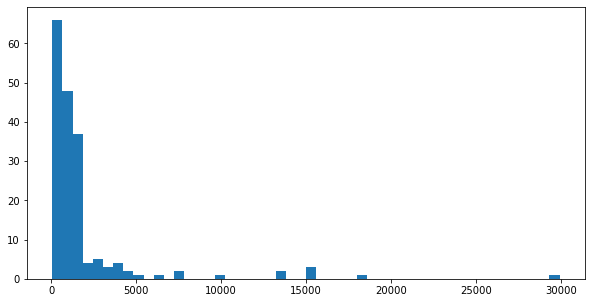

In [31]:
plt.hist(filled_vals, bins=50)

In [32]:
median_val = np.median(filled_vals)
median_val

943.12

In [33]:
for i in range(len(processed_powers)):
    if processed_powers[i] is None:
        processed_powers[i] = median_val

In [34]:
total_poweer = sum(processed_powers)
total_poweer

644855.0799999987

In [35]:
# https://yearbook.enerdata.ru/total-energy/world-energy-production.html
total = 2.7 * 10 ** 13 # total ~2700 TWh for 2020

proporsion = total_poweer / total * 100
proporsion

2.3883521481481434e-06